# Auto Regressor Model by Mr. Harshit Dawar
* This is the basic fundamental which should be clear before implementing RNN.
* It is the backbone of the correct/right Forecast which is required by RNN.

## Importing the required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [10]:
timeSeriesData = np.sin(0.3 * np.arange(500))

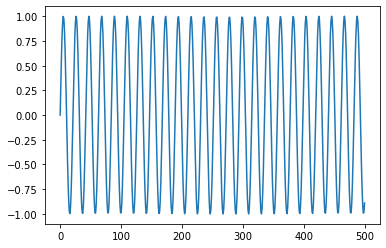

In [11]:
plt.plot(timeSeriesData)
pl